# C4 sensitivity vs density

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uproot
import pandas as pd

## Datasets

In [2]:
# Tungsten
# filename = '/Users/jcaravaca/Work_Local/data_overflow/C4/gate/results/C4_12heads_tungsten_hole0p7_pointsource_50keV_1MBq_10s.root'
# filename = '/Users/jcaravaca/Work_Local/data_overflow/C4/gate/results/C4_12heads_tungsten_hole0p7_pointsource_100keV_1MBq_10s.root'
# filename = '/Users/jcaravaca/Work_Local/data_overflow/C4/gate/results/C4_12heads_tungsten_hole0p7_pointsource_140keV_1MBq_10s.root'
# filename = '/Users/jcaravaca/Work_Local/data_overflow/C4/gate/results/C4_12heads_tungsten_hole0p7_pointsource_218keV_1MBq_10s.root'
# filename = '/Users/jcaravaca/Work_Local/data_overflow/C4/gate/results/C4_12heads_tungsten_hole0p7_pointsource_356keV_1MBq_10s.root'
# filename = '/Users/jcaravaca/Work_Local/data_overflow/C4/gate/results/C4_12heads_tungsten_hole0p7_pointsource_440keV_1MBq_10s.root'

# filename = '/Users/jcaravaca/Work_Local/data_overflow/C4/gate/results/C4_12heads_tungsten_hole0p7_sphericalsourcecenter_140keV_1MBq_1s.root'
# filename = '/Users/jcaravaca/Work_Local/data_overflow/C4/gate/results/C4_12heads_tungsten_hole0p7_sphericalsourcecenter_218keV_1MBq_1s.root'
# filename = '/Users/jcaravaca/Work_Local/data_overflow/C4/gate/results/C4_12heads_tungsten_hole0p7_sphericalsourcecenter_365keV_1MBq_1s.root'
# filename = '/Users/jcaravaca/Work_Local/data_overflow/C4/gate/results/C4_12heads_tungsten_hole0p7_sphericalsourcecenter_440keV_1MBq_1s.root'
# filename = '/Users/jcaravaca/Work_Local/data_overflow/C4/gate/results/C4_12heads_tungsten_hole0p7_sphericalsourcecenter_511keV_1MBq_1s.root'


# Tungsten epoxy
# filename = '/Users/jcaravaca/Work_Local/data_overflow/C4/gate/results/C4_12heads_tungstenepoxy_hole0p7_pointsource_50keV_1MBq_10s.root'
# filename = '/Users/jcaravaca/Work_Local/data_overflow/C4/gate/results/C4_12heads_tungstenepoxy_hole0p7_pointsource_100keV_1MBq_10s.root'
# filename = '/Users/jcaravaca/Work_Local/data_overflow/C4/gate/results/C4_12heads_tungstenepoxy_hole0p7_pointsource_140keV_1MBq_10s.root'
# filename = '/Users/jcaravaca/Work_Local/data_overflow/C4/gate/results/C4_12heads_tungstenepoxy_hole0p7_pointsource_218keV_1MBq_10s.root'
# filename = '/Users/jcaravaca/Work_Local/data_overflow/C4/gate/results/C4_12heads_tungstenepoxy_hole0p7_pointsource_356keV_1MBq_10s.root'
# filename = '/Users/jcaravaca/Work_Local/data_overflow/C4/gate/results/C4_12heads_tungstenepoxy_hole0p7_pointsource_440keV_1MBq_10s.root'

# filename = '/Users/jcaravaca/Work_Local/data_overflow/C4/gate/results/C4_12heads_tungstenepoxy_hole0p7_sphericalsourcecenter_140keV_1MBq_1s.root'
filename = '/Users/jcaravaca/Work_Local/data_overflow/C4/gate/results/C4_12heads_tungstenepoxy_hole0p7_sphericalsourcecenter_218keV_1MBq_1s.root'
# filename = '/Users/jcaravaca/Work_Local/data_overflow/C4/gate/results/C4_12heads_tungstenepoxy_hole0p7_sphericalsourcecenter_365keV_1MBq_1s.root'
# filename = '/Users/jcaravaca/Work_Local/data_overflow/C4/gate/results/C4_12heads_tungstenepoxy_hole0p7_sphericalsourcecenter_440keV_1MBq_1s.root'
# filename = '/Users/jcaravaca/Work_Local/data_overflow/C4/gate/results/C4_12heads_tungstenepoxy_hole0p7_sphericalsourcecenter_511keV_1MBq_1s.root'


In [3]:
f = uproot.open(filename)
singles = f['Singles']
singles = singles.arrays()
type(singles)

# Convert to pandas
singles_df = pd.DataFrame()
singles_df['energy'] = singles['energy'].tolist()
singles_df['eventID'] = singles['eventID'].tolist()
singles_df['pixelID'] = singles['pixelID'].tolist()
# singles_df

## Calculate Compton sensitivity

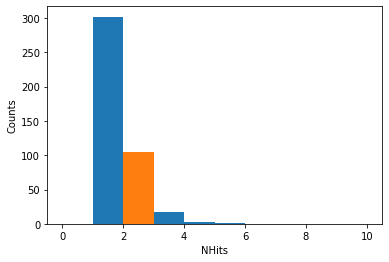

In [4]:
nhits = singles_df.groupby(['eventID'])['energy'].count()
nhits_2 = nhits[nhits==2]

plt.hist(nhits,bins=10,range=(0,10))
plt.hist(nhits_2,bins=10,range=(0,10))
plt.xlabel('NHits')
plt.ylabel('Counts')
plt.show()

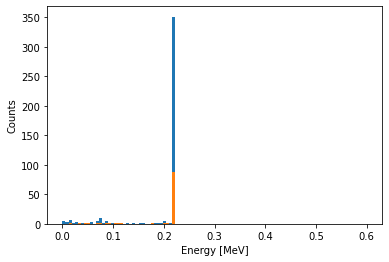

In [5]:
energy = singles_df.groupby(['eventID'])['energy'].sum()
energy_2 = energy[nhits==2]

plt.hist(energy,bins=100,range=(0,0.600))
plt.hist(energy_2,bins=100,range=(0,0.600))
plt.xlabel('Energy [MeV]')
plt.ylabel('Counts')
plt.show()

In [6]:
def comptonSensi(singles_df,e_lo,e_hi,acq_time,activity):
    nhits = singles_df.groupby(['eventID'])['energy'].count()
    energy = singles_df.groupby(['eventID'])['energy'].sum()
    energy_2 = energy[nhits==2]
    energy_2_sel = energy_2[(energy_2>e_lo)&(energy_2<e_hi)]
    ncounts = len(energy_2_sel)
    sensi = ncounts/acq_time/activity
    return sensi

In [7]:
ACQ_TIME =    1.   #s
ACTIVITY =    1.0  #MBq
E = 0.511
ECUT = 0.05
sensi = comptonSensi(singles_df,E*(1-ECUT),E*(1+ECUT),ACQ_TIME,ACTIVITY)
print('Sensitivity =',sensi)

Sensitivity = 0.0


## Calculate SPECT sensitivity

### Energy distribution

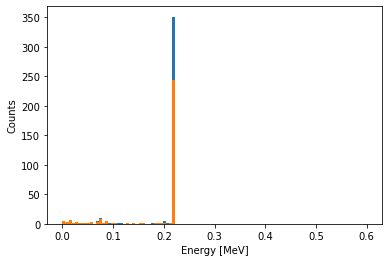

In [8]:
energy = singles_df.groupby(['eventID'])['energy'].sum()
energy_2 = energy[nhits==1]

plt.hist(energy,bins=100,range=(0,0.600))
plt.hist(energy_2,bins=100,range=(0,0.600))
plt.xlabel('Energy [MeV]')
plt.ylabel('Counts')
plt.show()

In [9]:
def CollimatorSensi(singles_df,e_lo,e_hi,acq_time,activity):
    nhits = singles_df.groupby(['eventID'])['energy'].count()
    energy = singles_df.groupby(['eventID'])['energy'].sum()
    energy_2 = energy[nhits==1]
    energy_2 = energy
    energy_2_sel = energy_2[(energy_2>e_lo)&(energy_2<e_hi)]
    ncounts = len(energy_2_sel)
    sensi = ncounts/acq_time/activity
    return sensi

In [10]:
ACQ_TIME =    1.   #s
ACTIVITY =    1.0  #MBq
E = 0.218
ECUT = 0.05
sensi = CollimatorSensi(singles_df,E*(1-ECUT),E*(1+ECUT),ACQ_TIME,ACTIVITY)
print('Sensitivity = %.2fcps/MBq'%sensi)

Sensitivity = 353.00cps/MBq


## Summary plots

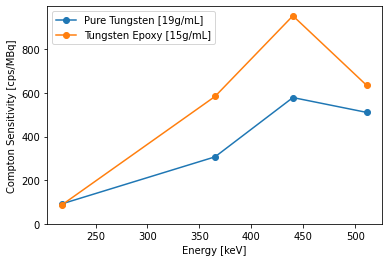

In [11]:
ComptonSensi_tungsten = np.array([92.0,307.0,579.0,511.])
ComptonSensi_tungsten_epoxy = np.array([88.0,584.0,954.0,635.0])
energies = np.array([218.,365.,440.,511.])

plt.plot(energies,ComptonSensi_tungsten,marker='o',label='Pure Tungsten [19g/mL]')
plt.plot(energies,ComptonSensi_tungsten_epoxy,marker='o',label='Tungsten Epoxy [15g/mL]')
plt.ylim(0)
plt.ylabel('Compton Sensitivity [cps/MBq]')
plt.xlabel('Energy [keV]')
plt.legend(loc='upper left')
plt.show()

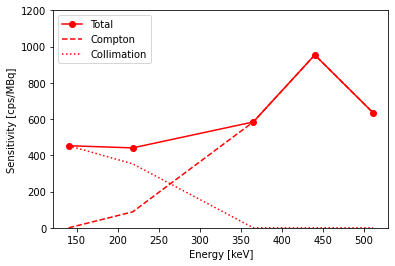

In [15]:
# sensi_total_standard = np.array([350.,300.0,200.0,579.0,511.])
sensi_compton_c4 = np.array([0.,88.0,584.0,954.0,635.0])
sensi_col_c4 = np.array([453.,353.0,0.0,0.0,0.0])
sensi_total_c4 = np.array([453.,88.0+353.0,584.0,954.0,635.0])
energies = np.array([140.,218.,365.,440.,511.])

# plt.plot(energies,sensi_total_standard,marker='o',label='State-of-the-art',color='Gray')
plt.plot(energies,sensi_total_c4,marker='o',label='Total',color='Red')
plt.plot(energies,sensi_compton_c4,label='Compton',color='Red',linestyle='--')
plt.plot(energies,sensi_col_c4,label='Collimation',color='Red',linestyle=':')
plt.ylim(0,1200)
plt.ylabel('Sensitivity [cps/MBq]')
plt.xlabel('Energy [keV]')
plt.legend(loc='upper left')
plt.show()